<a href="https://colab.research.google.com/github/AminOcin/cse366_lab3/blob/main/366_lab2_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import random
import math
import matplotlib.pyplot as plt

smartphones


In [21]:
def argmaxall(gen):
    """gen is a generator of (element,value) pairs, where value is a real.
    argmaxall returns a list of all of the elements with maximal value.
    """
    maxv = -math.inf       # negative infinity
    maxvals = []      # list of maximal elements
    for (e,v) in gen:
        if v>maxv:
            maxvals,maxv = [e], v
        elif v==maxv:
            maxvals.append(e)
    return maxvals

In [22]:
def argmaxe(gen):
    """gen is a generator of (element,value) pairs, where value is a real.
    argmaxe returns an element with maximal value.
    If there are multiple elements with the max value, one is returned at random.
    """
    return random.choice(argmaxall(gen))


In [23]:
def argmax(lst):
    """returns maximum index in a list"""
    return argmaxe(enumerate(lst))

In [24]:
def argmaxd(dct):
   """returns the arg max of a dictionary dct"""
   return argmaxe(dct.items())

In [25]:
def flip(prob):
    """return true with probability prob"""
    return random.random() < prob

In [26]:
def select_from_dist(item_prob_dist):
  #{6:0.1, 5:0.1, 4:0.1, 3:0.3, 2:0.2, 1:0.2}
    """ returns a value from a distribution.
    item_prob_dist is an item:probability dictionary, where the
        probabilities sum to 1.
    returns an item chosen in proportion to its probability
    """
    ranreal = random.random()
    for (it,prob) in item_prob_dist.items():
        if ranreal < prob:
            return it
        else:
            ranreal -= prob
    raise RuntimeError(f"{item_prob_dist} is not a probability distribution")

In [27]:
class Displayable(object):
    """Class that uses 'display'.
    The amount of detail is controlled by max_display_level
    """
    max_display_level = 1   # can be overridden in subclasses or instances

    def display(self,level,*args,**nargs):
        """print the arguments if level is less than or equal to the
        current max_display_level.
        level is an integer.
        the other arguments are whatever arguments print can take.
        """

        if level <= self.max_display_level:
            print(*args, **nargs)  ##if error you are using Python2 not Python3




In [36]:
class Plot_history(object):
    """Set up the plot for history of price and number in stock"""
    def __init__(self, ag, env):
        self.ag = ag
        self.env = env
        plt.ion()
        plt.xlabel("Time")
        plt.ylabel("Value")


    def plot_env_hist(self):
        """plot history of price and instock"""
        num = len(env.stock_history)
        plt.plot(range(num),env.price_history,label="Price")
        plt.plot(range(num),env.stock_history,label="In stock")
        plt.legend()
        #plt.draw()

    def plot_agent_hist(self):
        """plot history of buying"""
        num = len(ag.buy_history)
        plt.bar(range(1,num+1), ag.buy_history, label="Bought")
        plt.legend()
        #plt.draw()

In [29]:
#from display import Displayable

class Agent(Displayable):

    def initial_action(self, percept):
        """return the initial action."""
        return self.select_action(percept)   # same as select_action

    def select_action(self, percept):
        """return the next action (and update internal state) given percept
        percept is variable:value dictionary
        """
        raise NotImplementedError("go")   # abstract method

In [30]:
class Environment(Displayable):
    def initial_percept(self):
        """returns the initial percept for the agent"""
        raise NotImplementedError("initial_percept")   # abstract method

    def do(self, action):
        """does the action in the environment
        returns the next percept """
        raise NotImplementedError("Environment.do")   # abstract method


In [31]:
class Simulate(Displayable):
    """simulate the interaction between the agent and the environment
    for n time steps.
    Returns a pair of the agent state and the environment state.
    """
    def __init__(self,agent, environment):
        self.agent = agent
        self.env = environment
        self.percept = self.env.initial_percept()
        self.percept_history = [self.percept]
        self.action_history = []

    def go(self, n):
        for i in range(n):
            action = self.agent.select_action(self.percept)
            print(f"i={i} action={action}")

            self.percept = self.env.do(action,i)
            print(f"      percept={self.percept}")




In [32]:
class TP_env(Environment):
    price_delta = [0, 0, 0, 21, 0, 20, 0, -64, 0, 0, 23, 0, 0, 0, -35,
        0, 76, 0, -41, 0, 0, 0, 21, 0, 5, 0, 5, 0, 0, 0, 5, 0, -15, 0, 5,
       0, 5, 0, -115, 0, 115, 0, 5, 0, -15, 0, 5, 0, 5, 0, 0, 0, 5, 0,
       -59, 0, 44, 0, 5, 0, 5, 0, 0, 0, 5, 0, -65, 50, 0, 5, 0, 5, 0, 0,
       0, 5, 0]
    sd = 5  # noise standard deviation

    def __init__(self):
        """paper buying agent"""
        self.time=0
        self.stock=20
        self.stock_history = []  # memory of the stock history
        self.price_history = []  # memory of the price history

    def initial_percept(self):
        """return initial percept"""
        self.stock_history.append(self.stock)
        self.price = round(600+self.sd*random.gauss(0,1))
        self.price_history.append(self.price)
        #print(f"Initial price: {self.price} ,instock: {self.stock}")
        return {'price': self.price,
                'instock': self.stock}

    def do(self, action, time_unit):
        """does action (buy) and returns percept consisting of price and instock"""
        sold = select_from_dist({6:0.1, 5:0.1, 4:0.1, 3:0.3, 2:0.2, 1:0.2})
        print(f"i={time_unit} sold={sold}")
        # used = select_from_dist({7:0.1, 6:0.2, 5:0.2, 4:0.3, 3:0.1, 2:0.1}) # uses more paper
        bought = action['buy']
        self.stock = self.stock+bought-sold
        self.stock_history.append(self.stock)
        self.time += 1
        self.price =  round(self.price
                        + self.price_delta[self.time%len(self.price_delta)] # repeating pattern
                        + self.sd*random.gauss(0,1)) # plus randomness
        self.price_history.append(self.price)
        return {'price': self.price,
                'instock': self.stock}


i=0 action={'buy': 0}
i=0 sold=3
      percept={'price': 717, 'instock': 11}
i=1 action={'buy': 0}
i=1 sold=1
      percept={'price': 714, 'instock': 10}
i=2 action={'buy': 0}
i=2 sold=3
      percept={'price': 722, 'instock': 7}
i=3 action={'buy': 10}
i=3 sold=3
      percept={'price': 722, 'instock': 14}
i=4 action={'buy': 0}
i=4 sold=3
      percept={'price': 604, 'instock': 11}
i=5 action={'buy': 0}
i=5 sold=3
      percept={'price': 600, 'instock': 8}
i=6 action={'buy': 10}
i=6 sold=1
      percept={'price': 718, 'instock': 17}
i=7 action={'buy': 0}
i=7 sold=3
      percept={'price': 720, 'instock': 14}
i=8 action={'buy': 0}
i=8 sold=5
      percept={'price': 716, 'instock': 9}
i=9 action={'buy': 10}
i=9 sold=4
      percept={'price': 722, 'instock': 15}
i=10 action={'buy': 0}
i=10 sold=6
      percept={'price': 706, 'instock': 9}
i=11 action={'buy': 10}
i=11 sold=5
      percept={'price': 695, 'instock': 14}
i=12 action={'buy': 0}
i=12 sold=4
      percept={'price': 699, 'instock

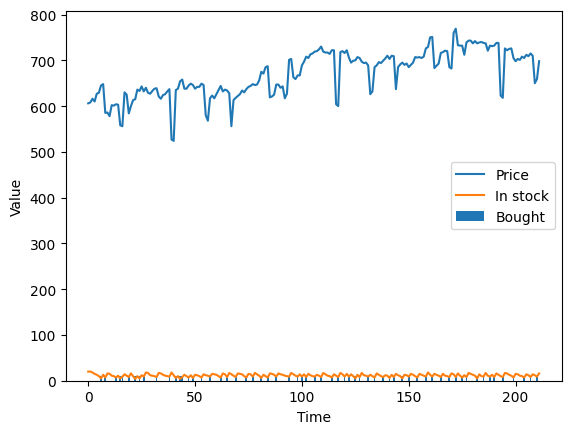

In [37]:
sim.go(100);
print(f"agent spent ${ag.spent/100}")
pl = Plot_history(ag,env); pl.plot_env_hist(); pl.plot_agent_hist()

In [33]:
class TP_agent(Agent):
    def __init__(self):
        self.spent = 0
        percept = env.initial_percept()
        self.ave = self.last_price = percept['price']
        self.instock = percept['instock']
        self.buy_history = []

    def select_action(self, percept):
        """return next action to carry out
        """
        self.last_price = percept['price']
        self.ave = self.ave+(self.last_price-self.ave)*0.05
        self.instock = percept['instock']
        if self.last_price < 0.2*self.ave and self.instock < 20:
            tobuy = 15
        elif self.instock < 10:
            tobuy = 10
        else:
            tobuy = 0
        self.spent += tobuy*self.last_price
        self.buy_history.append(tobuy)
        #print(f"agent buy:{tobuy}")
        return {'buy': tobuy}


In [34]:
env = TP_env()
ag = TP_agent()
sim = Simulate(ag,env)
sim.go(10)
ag.spent/env.time

i=0 action={'buy': 0}
i=0 sold=2
      percept={'price': 616, 'instock': 18}
i=1 action={'buy': 0}
i=1 sold=3
      percept={'price': 610, 'instock': 15}
i=2 action={'buy': 0}
i=2 sold=2
      percept={'price': 627, 'instock': 13}
i=3 action={'buy': 0}
i=3 sold=3
      percept={'price': 629, 'instock': 10}
i=4 action={'buy': 0}
i=4 sold=5
      percept={'price': 645, 'instock': 5}
i=5 action={'buy': 10}
i=5 sold=2
      percept={'price': 648, 'instock': 13}
i=6 action={'buy': 0}
i=6 sold=6
      percept={'price': 585, 'instock': 7}
i=7 action={'buy': 10}
i=7 sold=1
      percept={'price': 586, 'instock': 16}
i=8 action={'buy': 0}
i=8 sold=1
      percept={'price': 578, 'instock': 15}
i=9 action={'buy': 0}
i=9 sold=4
      percept={'price': 602, 'instock': 11}


1230.0

i=0 action={'buy': 0}
i=0 sold=2
      percept={'price': 695, 'instock': 14}
i=1 action={'buy': 0}
i=1 sold=1
      percept={'price': 705, 'instock': 13}
i=2 action={'buy': 0}
i=2 sold=4
      percept={'price': 700, 'instock': 9}
i=3 action={'buy': 10}
i=3 sold=5
      percept={'price': 706, 'instock': 14}
i=4 action={'buy': 0}
i=4 sold=3
      percept={'price': 709, 'instock': 11}
i=5 action={'buy': 0}
i=5 sold=2
      percept={'price': 713, 'instock': 9}
i=6 action={'buy': 10}
i=6 sold=4
      percept={'price': 715, 'instock': 15}
i=7 action={'buy': 0}
i=7 sold=3
      percept={'price': 719, 'instock': 12}
i=8 action={'buy': 0}
i=8 sold=1
      percept={'price': 710, 'instock': 11}
i=9 action={'buy': 0}
i=9 sold=3
      percept={'price': 650, 'instock': 8}
i=10 action={'buy': 10}
i=10 sold=6
      percept={'price': 700, 'instock': 12}
i=11 action={'buy': 0}
i=11 sold=2
      percept={'price': 698, 'instock': 10}
i=12 action={'buy': 0}
i=12 sold=2
      percept={'price': 704, 'instock

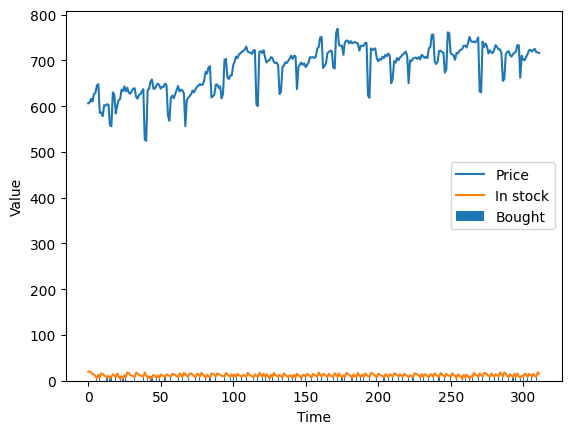

In [38]:
sim.go(100);
print(f"agent spent ${ag.spent/100}")
pl = Plot_history(ag,env); pl.plot_env_hist(); pl.plot_agent_hist()